In [27]:
import pandas as pd

# Load the datasets
posts_df = pd.read_excel('/kaggle/input/revolution-24/AUG_Revolt_24 - Sheet1.xlsx')
stopwords_df = pd.read_excel('/kaggle/input/stopwords/stopwords_bangla.xlsx')

In [28]:
posts_df.head()

,date,Headline,Sentiment
0,2024-07-05,ঢাকা বিশ্ববিদ্যালয়: কোটাবিরোধী আন্দোলনের নেতাক...,outrage
1,2024-07-05,কোটাবিরোধী আন্দোলনে ঢাকা বিশ্ববিদ্যালয়ের বিএনপ...,hope
2,2024-07-05,কোটাবিরোধী আন্দোলন : আজও জিরো পয়েন্ট অবরোধ করে...,outrage
3,2024-07-06,"সর্বজনীন পেনশন: সরকার অনড়, আন্দোলন চালিয়ে যাবে...",outrage
4,2024-07-06,আজ শনিবার সকাল সাড়ে ১০টার দিকে মহাসড়কের শহর বা...,outrage


In [29]:
# drop the date column
posts_df.drop('date', axis=1, inplace=True)

In [30]:
stopwords_df.head()

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ


In [31]:
def english_to_bangla_number_text(number):
    """Converts an English number to Bangla textual representation."""
    bangla_numbers = {
        0: "শূন্য", 1: "এক", 2: "দুই", 3: "তিন", 4: "চার",
        5: "পাঁচ", 6: "ছয়", 7: "সাত", 8: "আট", 9: "নয়",
        10: "দশ", 11: "এগারো", 12: "বারো", 13: "তেরো", 14: "চৌদ্দ",
        15: "পনেরো", 16: "ষোলো", 17: "সতেরো", 18: "আঠারো", 19: "উনিশ",
        20: "বিশ", 21: "একুশ", 22: "বাইশ", 23: "তেইশ", 24: "চব্বিশ",
        25: "পঁচিশ", 26: "ছাব্বিশ", 27: "সাতাশ", 28: "আটাশ", 29: "ঊনত্রিশ",
        30: "ত্রিশ", 31: "একত্রিশ", 32: "বত্রিশ", 33: "তেত্রিশ", 34: "চৌত্রিশ",
        35: "পঁত্রিশ", 36: "ছত্রিশ", 37: "সাঁইত্রিশ", 38: "আটত্রিশ", 39: "ঊনচল্লিশ",
        40: "চল্লিশ", 41: "একচল্লিশ", 42: "বিয়াল্লিশ", 43: "তেতাল্লিশ", 44: "চুয়াল্লিশ",
        45: "পঁইয়াল্লিশ", 46: "ছিয়াল্লিশ", 47: "সাতচল্লিশ", 48: "আটচল্লিশ", 49: "ঊনপঞ্চাশ",
        50: "পঞ্চাশ", 51: "একান্ন", 52: "বাহান্ন", 53: "তিপ্পান্ন", 54: "চুয়ান্ন",
        55: "পঞ্চান্ন", 56: "ছাপ্পান্ন", 57: "সাতান্ন", 58: "আটান্ন", 59: "ঊনষাট",
        60: "ষাট", 61: "একষট্টি", 62: "বাষট্টি", 63: "তেষট্টি", 64: "চৌষট্টি",
        65: "পঁষট্টি", 66: "ছেষট্টি", 67: "সাতষট্টি", 68: "আটষট্টি", 69: "ঊনসত্তর",
        70: "সত্তর", 71: "একাত্তর", 72: "বাহাত্তর", 73: "তিয়াত্তর", 74: "চুয়াত্তর",
        75: "পঁচাত্তর", 76: "ছিয়াত্তর", 77: "সাতাত্তর", 78: "আটাত্তর", 79: "ঊনআশি",
        80: "আশি", 81: "একাশি", 82: "বিরাশি", 83: "তিরাশি", 84: "চুরাশি",
        85: "পঁচাশি", 86: "ছিয়াশি", 87: "সাতাশি", 88: "আটাশি", 89: "ঊননব্বই",
        90: "নব্বই", 91: "একানব্বই", 92: "বিরানব্বই", 93: "তিরানব্বই", 94: "চুরানব্বই",
        95: "পঁচানব্বই", 96: "ছিয়ানব্বই", 97: "সাতানব্বই", 98: "আটানব্বই", 99: "নিরানব্বই",
    }

    def convert_two_digit_number(n):
        """Handles numbers from 0 to 99 based on direct mapping."""
        if n in bangla_numbers:
            return bangla_numbers[n]
        tens = (n // 10) * 10
        units = n % 10
        return f"{bangla_numbers[tens]} {bangla_numbers[units]}" if units > 0 else bangla_numbers[tens]

    if number < 100:
        return convert_two_digit_number(number)
    elif number < 1000:
        hundreds = number // 100
        remainder = number % 100
        if remainder == 0:
            return f"{bangla_numbers[hundreds]} শত"
        return f"{bangla_numbers[hundreds]} শত {convert_two_digit_number(remainder)}"
    elif number < 100000: #Handle numbers from 1000 to 99,999
        parts = []
        if number >= 1000:
            parts.append(f"{english_to_bangla_number_text(number // 1000)} হাজার")
            number %= 1000
        if number > 0:
            if number >= 100:
              parts.append(english_to_bangla_number_text(number))
            else:
              parts.append(convert_two_digit_number(number))  #handles cases less than 100
        return " ".join(parts)
    elif number < 10000000: #handles numbers from 100,000 to 9,999,999
      parts = []
      if number >= 100000:
          parts.append(f"{english_to_bangla_number_text(number // 100000)} লক্ষ")
          number %= 100000
      if number > 0:
          if number >= 1000:
            parts.append(english_to_bangla_number_text(number))
          elif number > 0:
            if number >= 100:
                parts.append(english_to_bangla_number_text(number))
            else:
              parts.append(convert_two_digit_number(number)) #handle numbers less than 100
      return " ".join(parts)
    else: # Handle numbers >= 10,000,000 (Crore)
        parts = []
        if number >= 10000000:
            parts.append(f"{english_to_bangla_number_text(number // 10000000)} কোটি")
            number %= 10000000
        if number > 0:
            parts.append(english_to_bangla_number_text(number))
        return " ".join(parts)

In [32]:
import re

def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\u2600-\u26FF"          # miscellaneous symbols
                               u"\u2700-\u27BF"          # dingbats
                               u"\u2000-\u206F"          # general punctuations
                               "]+", flags=re.UNICODE)
    english_pattern = re.compile('[a-zA-Z]+', flags=re.I)

    text = emoji_pattern.sub(r'', text)
    text = english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct += char

    return no_punct

def convert_numbers_to_bangla(text):
    words = text.split()
    converted_words = []
    for word in words:
        if word.isdigit():  # Check if the word is an integer
            bangla_number = english_to_bangla_number_text(int(word))
            converted_words.append(bangla_number)
        else:
            converted_words.append(word)
    return ' '.join(converted_words)

def preprocessing(text):
    text = replace_strings(text)
    text = convert_numbers_to_bangla(text)  # Convert numbers to Bangla
    text = remove_punctuations(text)
    return text

In [33]:
def test_preprocessing():
    test_cases = [
        ("আজ আমার জন্মদিন 🎉! আমি 89 বছর পুরনো।", "আজ আমার জন্মদিন আমি পঁচিশ বছর পুরনো।"),
    ]

    for i, (input_text, expected_output) in enumerate(test_cases, 1):
        result = preprocessing(input_text)
        print(f"'{expected_output}' || '{result}'")

# Run the tests
test_preprocessing()

'আজ আমার জন্মদিন আমি পঁচিশ বছর পুরনো।' || 'আজ আমার জন্মদিন  আমি ঊননব্বই বছর পুরনো'


In [34]:
# prompt: for each Headline column of posts_df, apply the preprocessing function to each row

posts_df['Headline'] =posts_df['Headline'].apply(lambda x: preprocessing(str(x)))
posts_df.head()

,Headline,Sentiment
0,ঢাকা বিশ্ববিদ্যালয় কোটাবিরোধী আন্দোলনের নেতাকে...,outrage
1,কোটাবিরোধী আন্দোলনে ঢাকা বিশ্ববিদ্যালয়ের বিএনপ...,hope
2,কোটাবিরোধী আন্দোলন আজও জিরো পয়েন্ট অবরোধ করে ...,outrage
3,সর্বজনীন পেনশন সরকার অনড় আন্দোলন চালিয়ে যাবেন ...,outrage
4,আজ শনিবার সকাল সাড়ে টার দিকে মহাসড়কের শহর বাইপ...,outrage


In [35]:
# Remove Stopwords
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stopwords_df]

    out=' '.join(stm)

    return str(out)

In [36]:
posts_df['Headline'] =posts_df['Headline'].apply(lambda x: stopwordRemoval(str(x)))
posts_df.head()

,Headline,Sentiment
0,ঢাকা বিশ্ববিদ্যালয় কোটাবিরোধী আন্দোলনের নেতাকে...,outrage
1,কোটাবিরোধী আন্দোলনে ঢাকা বিশ্ববিদ্যালয়ের বিএনপ...,hope
2,কোটাবিরোধী আন্দোলন আজও জিরো পয়েন্ট অবরোধ করে খ...,outrage
3,সর্বজনীন পেনশন সরকার অনড় আন্দোলন চালিয়ে যাবেন ...,outrage
4,আজ শনিবার সকাল সাড়ে টার দিকে মহাসড়কের শহর বাইপ...,outrage


In [37]:
!pip install banglanltk bangla-stemmer

In [38]:
print(posts_df['Sentiment'].unique())

['outrage' 'hope' 'despair']


In [39]:
# Tokenize
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

posts_df['Headline'] = [tokenized_data(sent) for sent in posts_df['Headline'].tolist()]

In [40]:
# prompt: After tokenization, i want to create an array or a set, from each row, each list of words in the column 'Headline', add all the words into that list, and find out the length of the unique words.

from collections import Counter

unique_words_per_row = []
for row in posts_df['Headline']:
    unique_words_per_row.append(len(set(row)))

print(unique_words_per_row)
# Calculate the total number of unique words across all rows
all_words = [word for row in posts_df['Headline'] for word in row]
total_unique_words = len(set(all_words))
print(f"Total number of unique words across all rows: {total_unique_words}")

# #Example using Counter to get the frequency of each word
# word_counts = Counter(all_words)
# word_counts

[8, 7, 11, 8, 25, 16, 10, 5, 11, 5, 10, 8, 8, 15, 6, 20, 11, 8, 6, 7, 8, 5, 30, 9, 8, 22, 12, 5, 5, 8, 9, 7, 5, 10, 9, 7, 15, 9, 23, 11, 18, 22, 30, 9, 11, 12, 16, 7, 12, 11, 11, 11, 7, 8, 10, 10, 12, 6, 10, 6, 12, 7, 4, 7, 20, 10, 8, 19, 14, 6, 11, 18, 19, 13, 7, 6, 19, 12, 15, 16, 11, 23, 18, 24, 22, 21, 20, 8, 7, 19, 6, 17, 7, 6, 8, 9, 17, 6, 8, 10, 5, 16, 5, 14, 20, 14, 14, 22, 16, 11, 11, 10, 16, 9, 7, 7, 6, 12, 12, 8, 5, 21, 25, 10, 20, 8, 15, 32, 21, 14, 23, 20, 9, 24, 22, 18, 20, 21, 9, 16, 9, 9, 12, 11, 12, 18, 20, 18, 14, 9, 19, 14, 9, 17, 21, 18, 10, 9, 10, 7, 10, 13, 7, 16, 14, 12, 11, 18, 5, 6, 12, 8, 17, 8, 9, 14, 19, 5, 23, 20, 22, 11, 22, 15, 17, 24, 19, 19, 23, 18, 7, 10, 9, 16, 10, 8, 10, 10, 12, 7, 7, 10, 8, 10, 17, 20, 9, 6, 9, 8, 17, 11, 13, 12, 15, 11, 3, 5, 17, 8, 16, 11, 14, 8, 12, 9, 8, 17, 13, 7, 9, 10, 15, 6, 8, 19, 7, 9, 11, 15, 12, 7, 12, 7, 9, 4, 10, 8, 8, 14, 8, 8, 13, 6, 9, 9, 8, 6, 9, 9, 7, 7, 10, 10, 4, 9, 6, 12, 8, 9, 21, 13, 11, 7, 6, 15, 7, 7, 6, 10

In [41]:
posts_df.head()

,Headline,Sentiment
0,"[ঢাকা, বিশ্ববিদ্যালয়, কোটাবিরোধী, আন্দোলনের, ন...",outrage
1,"[কোটাবিরোধী, আন্দোলনে, ঢাকা, বিশ্ববিদ্যালয়ের, ...",hope
2,"[কোটাবিরোধী, আন্দোলন, আজও, জিরো, পয়েন্ট, অবরোধ...",outrage
3,"[সর্বজনীন, পেনশন, সরকার, অনড়, আন্দোলন, চালিয়ে,...",outrage
4,"[আজ, শনিবার, সকাল, সাড়ে, টার, দিকে, মহাসড়কের, ...",outrage


In [42]:
posts_df['Sentiment'].value_counts()

Sentiment
outrage    838
hope       838
despair    838
Name: count, dtype: int64

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
# Label Encoding and Splitting Data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(posts_df['Sentiment'])
X = posts_df['Headline']

In [45]:
# Label Encoding and Splitting Data
label_encoder = LabelEncoder()
# Convert the Sentiment column to strings before fitting LabelEncoder
posts_df['Sentiment'] = posts_df['Sentiment'].astype(str)
y = label_encoder.fit_transform(posts_df['Sentiment'])
X = posts_df['Headline']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [47]:
# TF-IDF Feature Extraction
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, use_idf=True, tokenizer=lambda x: x.split())
X_train_tfidf = tfidf.fit_transform([' '.join(tokens) for tokens in X_train])
X_test_tfidf = tfidf.transform([' '.join(tokens) for tokens in X_test])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [48]:
# # Word2Vec Embeddings
# w2v_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, sg=0, workers=4)
# w2v_model.train(X_train, total_examples=w2v_model.corpus_count, epochs=20)

# def get_word2vec_embedding(tokens, model):
#     embeddings = [model.wv[token] for token in tokens if token in model.wv]
#     return np.mean(embeddings, axis=0) if embeddings else np.zeros(model.vector_size)

# X_train_w2v = np.array([get_word2vec_embedding(tokens, w2v_model) for tokens in X_train])
# X_test_w2v = np.array([get_word2vec_embedding(tokens, w2v_model) for tokens in X_test])

In [49]:
# Model Training and Evaluation
label_order = label_encoder.classes_

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name, feature_type, original_X_test):
    print(f"\nTraining {model_name} with {feature_type} features...")
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test, target_names=label_order))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_order, yticklabels=label_order)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name} ({feature_type})")
    plt.show()

    #Example output of prediction
    print("\nSample Predictions:")
    for i in range(min(5, len(original_X_test))):
       print(f"Text: {' '.join(original_X_test.iloc[i])}, Predicted: {label_order[y_pred_test[i]]}, True: {label_order[y_test[i]]}")

In [50]:
# Models with TF-IDF
models_tfidf = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()

}

original_X_test = X_test


Training Logistic Regression with TF-IDF features...
Train Accuracy: 0.9766285430134262
Test Accuracy: 0.7952286282306164
Classification Report:
               precision    recall  f1-score   support

     despair       0.75      0.79      0.77       167
        hope       0.77      0.77      0.77       168
     outrage       0.88      0.83      0.85       168

    accuracy                           0.80       503
   macro avg       0.80      0.80      0.80       503
weighted avg       0.80      0.80      0.80       503



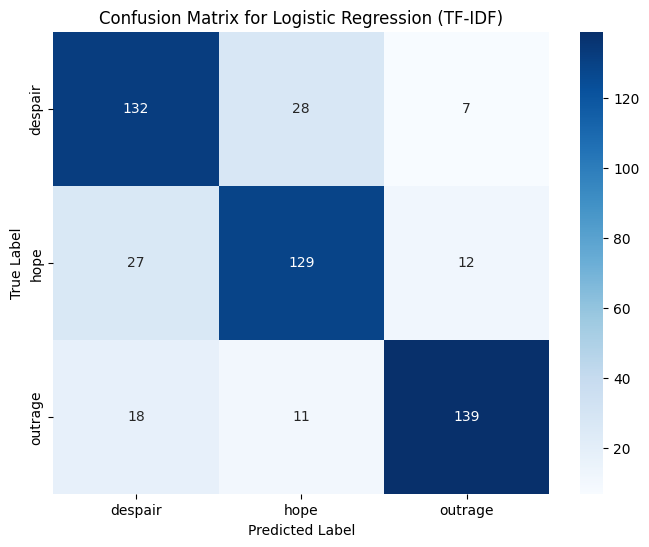


Sample Predictions:
Text: রাজধানীর উত্তরা মোহাদীপুর বাড্ডাসহ বিভিন্ন এলাকায় আন্দোলনকারীদের সঙ্গে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষ, Predicted: outrage, True: outrage
Text: ঢাকা বিশ্ববিদ্যালয়সহ বিভিন্ন ক্যাম্পাসে কোটা সংস্কার আন্দোলনকারীদের ওপর ছাত্রলীগের হামলার প্রতিবাদে ছাত্রলীগের পদধারী অনেক নেতা পদত্যাগ করেছেন, Predicted: despair, True: hope
Text: ঢালাও মামলা হচ্ছে আগে যাচাই করুন আইনশৃঙ্খলা রক্ষাকারী বাহিনীকে ফখরুল, Predicted: hope, True: hope
Text: উত্তরায় আওয়ামী লীগ নেতাকর্মী ও বিক্ষোভকারীদের মধ্যে সংঘর্ষ, Predicted: outrage, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope

Training Random Forest with TF-IDF features...
Train Accuracy: 1.0
Test Accuracy: 0.7514910536779325
Classification Report:
               precision    recall  f1-score   support

     despair       0.69      0.75      0.72       167
 

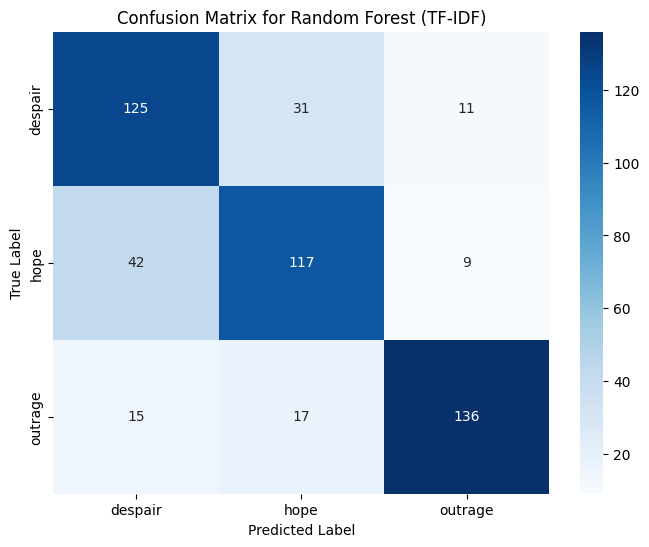


Sample Predictions:
Text: রাজধানীর উত্তরা মোহাদীপুর বাড্ডাসহ বিভিন্ন এলাকায় আন্দোলনকারীদের সঙ্গে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষ, Predicted: outrage, True: outrage
Text: ঢাকা বিশ্ববিদ্যালয়সহ বিভিন্ন ক্যাম্পাসে কোটা সংস্কার আন্দোলনকারীদের ওপর ছাত্রলীগের হামলার প্রতিবাদে ছাত্রলীগের পদধারী অনেক নেতা পদত্যাগ করেছেন, Predicted: despair, True: hope
Text: ঢালাও মামলা হচ্ছে আগে যাচাই করুন আইনশৃঙ্খলা রক্ষাকারী বাহিনীকে ফখরুল, Predicted: hope, True: hope
Text: উত্তরায় আওয়ামী লীগ নেতাকর্মী ও বিক্ষোভকারীদের মধ্যে সংঘর্ষ, Predicted: outrage, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope

Training SVM with TF-IDF features...
Train Accuracy: 0.9985082048731975
Test Accuracy: 0.7952286282306164
Classification Report:
               precision    recall  f1-score   support

     despair       0.74      0.78      0.76       

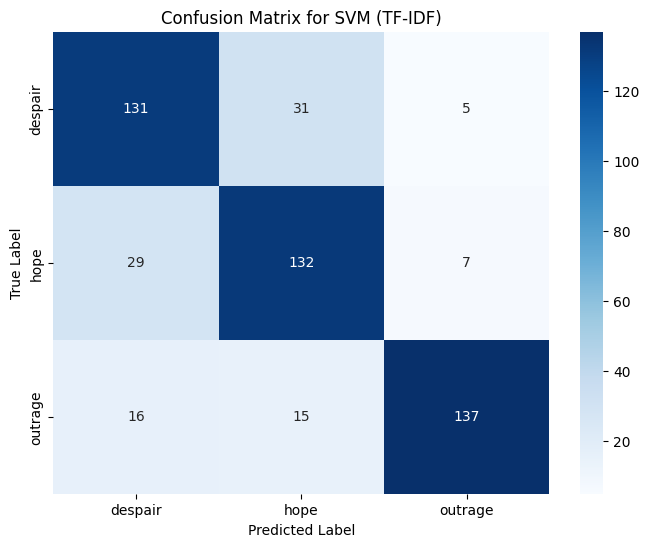


Sample Predictions:
Text: রাজধানীর উত্তরা মোহাদীপুর বাড্ডাসহ বিভিন্ন এলাকায় আন্দোলনকারীদের সঙ্গে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষ, Predicted: outrage, True: outrage
Text: ঢাকা বিশ্ববিদ্যালয়সহ বিভিন্ন ক্যাম্পাসে কোটা সংস্কার আন্দোলনকারীদের ওপর ছাত্রলীগের হামলার প্রতিবাদে ছাত্রলীগের পদধারী অনেক নেতা পদত্যাগ করেছেন, Predicted: despair, True: hope
Text: ঢালাও মামলা হচ্ছে আগে যাচাই করুন আইনশৃঙ্খলা রক্ষাকারী বাহিনীকে ফখরুল, Predicted: hope, True: hope
Text: উত্তরায় আওয়ামী লীগ নেতাকর্মী ও বিক্ষোভকারীদের মধ্যে সংঘর্ষ, Predicted: outrage, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope

Training Decision Tree with TF-IDF features...
Train Accuracy: 1.0
Test Accuracy: 0.658051689860835
Classification Report:
               precision    recall  f1-score   support

     despair       0.65      0.50      0.57       167
  

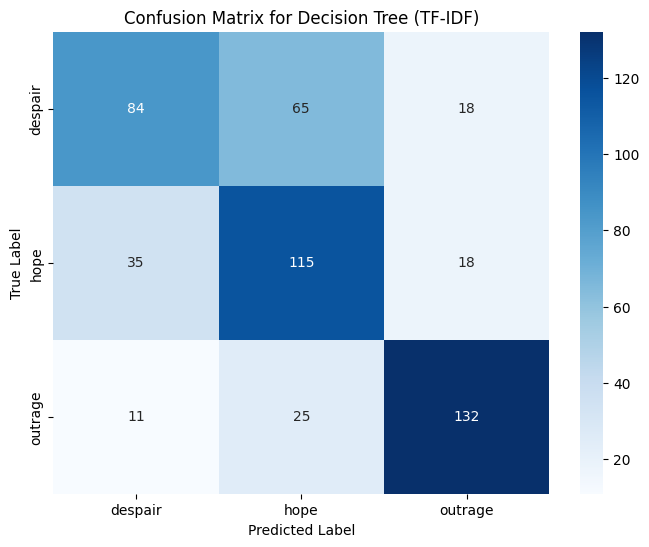


Sample Predictions:
Text: রাজধানীর উত্তরা মোহাদীপুর বাড্ডাসহ বিভিন্ন এলাকায় আন্দোলনকারীদের সঙ্গে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষ, Predicted: outrage, True: outrage
Text: ঢাকা বিশ্ববিদ্যালয়সহ বিভিন্ন ক্যাম্পাসে কোটা সংস্কার আন্দোলনকারীদের ওপর ছাত্রলীগের হামলার প্রতিবাদে ছাত্রলীগের পদধারী অনেক নেতা পদত্যাগ করেছেন, Predicted: despair, True: hope
Text: ঢালাও মামলা হচ্ছে আগে যাচাই করুন আইনশৃঙ্খলা রক্ষাকারী বাহিনীকে ফখরুল, Predicted: hope, True: hope
Text: উত্তরায় আওয়ামী লীগ নেতাকর্মী ও বিক্ষোভকারীদের মধ্যে সংঘর্ষ, Predicted: outrage, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope

Training KNN with TF-IDF features...
Train Accuracy: 0.8269517652909001
Test Accuracy: 0.7395626242544732
Classification Report:
               precision    recall  f1-score   support

     despair       0.72      0.71      0.71       

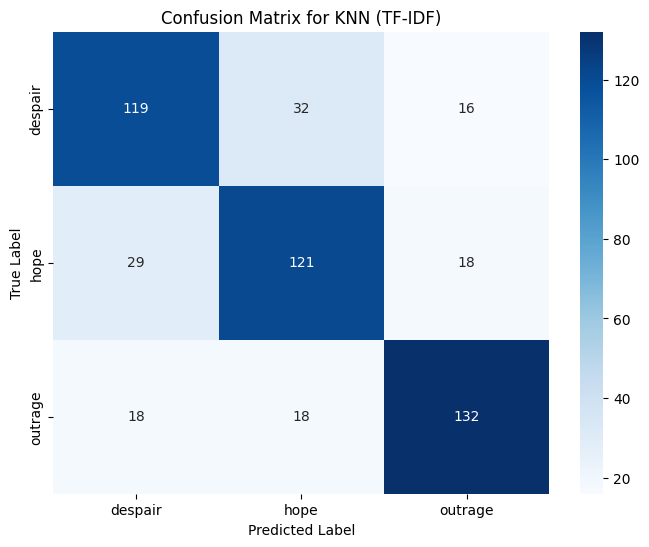


Sample Predictions:
Text: রাজধানীর উত্তরা মোহাদীপুর বাড্ডাসহ বিভিন্ন এলাকায় আন্দোলনকারীদের সঙ্গে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষে পুলিশের সংঘর্ষ, Predicted: outrage, True: outrage
Text: ঢাকা বিশ্ববিদ্যালয়সহ বিভিন্ন ক্যাম্পাসে কোটা সংস্কার আন্দোলনকারীদের ওপর ছাত্রলীগের হামলার প্রতিবাদে ছাত্রলীগের পদধারী অনেক নেতা পদত্যাগ করেছেন, Predicted: despair, True: hope
Text: ঢালাও মামলা হচ্ছে আগে যাচাই করুন আইনশৃঙ্খলা রক্ষাকারী বাহিনীকে ফখরুল, Predicted: outrage, True: hope
Text: উত্তরায় আওয়ামী লীগ নেতাকর্মী ও বিক্ষোভকারীদের মধ্যে সংঘর্ষ, Predicted: hope, True: outrage
Text: জাতিসংঘ মহাসচিবের মুখপাত্র স্টিফেন ডুজারিক বলেছেন বাংলাদেশে সাম্প্রতিক সহিংস কর্মকাণ্ডে জড়িত সব অপরাধীকে জবাবদিহির আওতায় আনতে হবে, Predicted: hope, True: hope


In [52]:
for model_name, model in models_tfidf.items():
    train_and_evaluate_model(model, X_train_tfidf, y_train, X_test_tfidf, y_test, model_name, "TF-IDF", original_X_test)

#Hyperparameter Tuning

## LogisticRegression

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
logModel = LogisticRegression(random_state=42)

In [58]:
# Parameter grid for GridSearchCV
param_grid_lr = {
    'C': [0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Norm used in the penalization
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

In [59]:
lr_grids = GridSearchCV(logModel, param_grid = param_grid_lr, cv = 5, verbose=True, n_jobs=-1)

In [60]:
lr_grids.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=True)

In [61]:
print("Best Estimator: ",lr_grids.best_estimator_)
print("Best Score: ", lr_grids.best_score_)

Best Estimator:  LogisticRegression(C=10, random_state=42, solver='liblinear')
Best Score:  0.7777316889497919


In [62]:
y_pred=lr_grids.predict(X_test_tfidf)

In [63]:
# See classification report
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       167
           1       0.74      0.76      0.75       168
           2       0.90      0.88      0.89       168

    accuracy                           0.80       503
   macro avg       0.80      0.80      0.80       503
weighted avg       0.80      0.80      0.80       503



## Random Forst

In [64]:
rf=RandomForestClassifier(random_state=42)

In [65]:
# Parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
}

In [66]:
rf_grid_search = GridSearchCV(rf,cv=5,verbose=True,n_jobs=-1,param_grid=param_grid_rf)

In [67]:
rf_grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=True)

In [68]:
print("Best Estimator: ",rf_grid_search.best_estimator_)
print("Best Score: ", rf_grid_search.best_score_)

Best Estimator:  RandomForestClassifier(criterion='entropy', max_depth=15, random_state=42)
Best Score:  0.6578966211127982


In [71]:
y_pred=rf_grid_search.predict(X_test_tfidf)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.72      0.65       167
           1       0.67      0.67      0.67       168
           2       0.83      0.65      0.73       168

    accuracy                           0.68       503
   macro avg       0.70      0.68      0.68       503
weighted avg       0.70      0.68      0.68       503



## Support Vector Machine(SVM)

In [73]:
svc=SVC(random_state=42)

In [74]:
# Parameter grid for GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3, 4]  # Degree of the polynomial kernel function
}

In [75]:
svc_grid = GridSearchCV(svc,verbose=True,n_jobs=-1,param_grid=param_grid_svm,cv=5)

In [76]:
svc_grid.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=True)

In [77]:
print("Best Estimator: ",svc_grid.best_estimator_)
print("Best Score: ", svc_grid.best_score_)

Best Estimator:  SVC(C=1, degree=2, kernel='linear', random_state=42)
Best Score:  0.7861918694369344


In [78]:
y_pred=svc_grid.predict(X_test_tfidf)

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       167
           1       0.73      0.79      0.75       168
           2       0.90      0.83      0.86       168

    accuracy                           0.79       503
   macro avg       0.79      0.79      0.79       503
weighted avg       0.79      0.79      0.79       503



## Decision Tree

In [109]:
dt = DecisionTreeClassifier(random_state=42)

In [110]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Split quality criteria
    'max_depth': [None, 10, 20, 30, 50],          # Depth of the tree
    'min_samples_split': [2, 5, 10, 20],          # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 5, 10],            # Min samples per leaf node
    'max_features': [None, 'sqrt', 'log2'],       # Number of features to consider when splitting
    'class_weight': [None, 'balanced'],           # Handle class imbalance
}

In [111]:
dt_grid_search = GridSearchCV(estimator=dt,verbose=True,n_jobs=-1, param_grid=param_grid, cv=5, scoring='accuracy')

In [112]:
dt_grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=True)

In [113]:
print("Best Estimator: ",dt_grid_search.best_estimator_)
print("Best Score: ", dt_grid_search.best_score_)

Best Estimator:  DecisionTreeClassifier(criterion='entropy', random_state=42)
Best Score:  0.6568830784045036


In [114]:
y_pred=dt_grid_search.predict(X_test_tfidf)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.54      0.57       167
           1       0.60      0.67      0.63       168
           2       0.78      0.79      0.78       168

    accuracy                           0.66       503
   macro avg       0.66      0.66      0.66       503
weighted avg       0.66      0.66      0.66       503



## KNN

In [87]:
knn=KNeighborsClassifier()

In [88]:
# Parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [20, 30, 40],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

In [90]:
dt_grid_search = GridSearchCV(estimator=knn,verbose=True,n_jobs=-1, param_grid=param_grid_knn, cv=5)

In [91]:
dt_grid_search.fit(X_train_tfidf, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [92]:
print("Best Estimator: ",dt_grid_search.best_estimator_)
print("Best Score: ", dt_grid_search.best_score_)

Best Estimator:  KNeighborsClassifier(leaf_size=20, weights='distance')
Best Score:  0.7215214251324025


In [94]:
y_pred=dt_grid_search.predict(X_test_tfidf)

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       167
           1       0.71      0.69      0.70       168
           2       0.76      0.87      0.81       168

    accuracy                           0.75       503
   macro avg       0.75      0.75      0.74       503
weighted avg       0.75      0.75      0.74       503



In [108]:
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

model = XGBClassifier(random_state=42, use_label_encoder=False)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Accuracy: 0.7041418219078306
